In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
deer_crashes = pd.read_csv("/content/drive/MyDrive/deercrashes.csv") #starting out with deer crash data


In [ ]:
deer_crashes.head(5)

,Year,County,Value,LastReportedDate,Unnamed: 4
0,2015,Anderson,86.0,2021-07-02,NaN
1,2015,Bedford,50.0,2021-07-02,NaN
2,2015,Benton,10.0,2021-07-02,NaN
3,2015,Bledsoe,5.0,2021-07-02,NaN
4,2015,Blount,51.0,2021-07-02,NaN


In [ ]:
deer_crashes.drop("Unnamed: 4", axis = 1, inplace = True) #Drop last column which doesn't have any real data in it

In [ ]:
deer_crashes.isna().value_counts() #We can see that the last row is the only null value

Year   County  Value  LastReportedDate
False  False   False  False               570
       True    True   True                  1
Name: count, dtype: int64

In [ ]:
deer_crashes.dropna(inplace = True)

In [ ]:
deer_crashes

,Year,County,Value,LastReportedDate
0,2015,Anderson,86.0,2021-07-02
1,2015,Bedford,50.0,2021-07-02
2,2015,Benton,10.0,2021-07-02
3,2015,Bledsoe,5.0,2021-07-02
4,2015,Blount,51.0,2021-07-02
...,...,...,...,...
565,2020,Wayne,27.0,2021-07-02
566,2020,Weakley,7.0,2021-07-02
567,2020,White,57.0,2021-07-02
568,2020,Williamson,265.0,2021-07-02


In [ ]:
deer_crashes.value_counts("County")

County
Anderson    6
Meigs       6
Polk        6
Pickett     6
Perry       6
           ..
Greene      6
Grainger    6
Giles       6
Gibson      6
Wilson      6
Name: count, Length: 95, dtype: int64

In [ ]:
deer_crashes.groupby("County")["Value"].mean() #Get running average from 2015-2020 for all counties


County
Anderson       82.333333
Bedford        73.166667
Benton         13.333333
Bledsoe         3.666667
Blount         48.666667
                 ...    
Wayne          34.833333
Weakley         5.500000
White          69.833333
Williamson    320.333333
Wilson        177.666667
Name: Value, Length: 95, dtype: float64

Text(0, 0.5, 'Average Number of Annual Deer Crashes (2015-2020)')

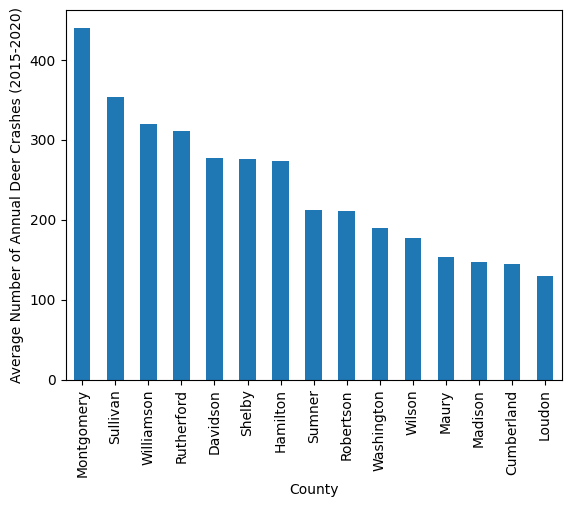

In [ ]:
deer_crashes.groupby("County")["Value"].mean().nlargest(15).plot(kind = "bar") #Plot top 15 counties. This will help cut down out search
plt.ylabel("Average Number of Annual Deer Crashes (2015-2020)")

Now that we have cutdown to the top 15 candidates, we can use future datasets and focus on these counties. The largest Average number of deer crashes over 5 years gives a good idea of counties that would have a high demand for Grill Guards

In [ ]:
top_fifteen = deer_crashes.groupby("County")["Value"].mean().nlargest(15).to_dict()

In [ ]:
top_fifteen #Store top 15 counties in key value pairs using a dictionary

{'Montgomery': 440.6666666666667,
 'Sullivan': 353.1666666666667,
 'Williamson': 320.3333333333333,
 'Rutherford': 311.1666666666667,
 'Davidson': 277.6666666666667,
 'Shelby': 276.3333333333333,
 'Hamilton': 273.1666666666667,
 'Sumner': 212.0,
 'Robertson': 210.83333333333334,
 'Washington': 190.16666666666666,
 'Wilson': 177.66666666666666,
 'Maury': 154.0,
 'Madison': 146.83333333333334,
 'Cumberland': 144.66666666666666,
 'Loudon': 130.0}

In [ ]:
forested_acres = pd.read_csv("/content/drive/MyDrive/forestedacreage.csv")

In [ ]:
forested_acres

,CountyName,Year,TotalAcres,ForestedAcres,ForestedArea,LastReportedDate,Unnamed: 6
0,Anderson,2018.0,220523.0,130628.0,0.592356,2019-03-19,NaN
1,Bedford,2018.0,303938.0,101427.0,0.333710,2019-03-19,NaN
2,Benton,2018.0,279055.0,170007.0,0.609223,2019-03-19,NaN
3,Bledsoe,2018.0,260486.0,199275.0,0.765011,2019-03-19,NaN
4,Blount,2018.0,362561.0,248776.0,0.686163,2019-03-19,NaN
...,...,...,...,...,...,...,...
92,Weakley,2018.0,372418.0,111938.0,0.300571,2019-03-19,NaN
93,White,2018.0,242418.0,137961.0,0.569103,2019-03-19,NaN
94,Williamson,2018.0,373505.0,144885.0,0.387906,2019-03-19,NaN
95,Wilson,2018.0,372775.0,134314.0,0.360308,2019-03-19,NaN


In [ ]:
forested_acres.drop("Unnamed: 6", axis = 1, inplace = True)

In [ ]:
forested_acres.dropna(inplace = True)

In [ ]:
forested_acres.value_counts()

CountyName  Year    TotalAcres  ForestedAcres  ForestedArea  LastReportedDate
Anderson    2018.0  220523.0    130628.0       0.592356      2019-03-19          1
Bedford     2018.0  303938.0    101427.0       0.333710      2019-03-19          1
Putnam      2018.0  255891.0    132303.0       0.517029      2019-03-19          1
Polk        2018.0  283133.0    210026.0       0.741793      2019-03-19          1
Pickett     2018.0  111450.0    69596.0        0.624462      2019-03-19          1
                                                                                ..
Greene      2018.0  399365.0    159538.0       0.399479      2019-03-19          1
Grainger    2018.0  193591.0    103952.0       0.536968      2019-03-19          1
Giles       2018.0  391245.0    224023.0       0.572589      2019-03-19          1
Gibson      2018.0  387247.0    69497.0        0.179464      2019-03-19          1
Wilson      2018.0  372775.0    134314.0       0.360308      2019-03-19          1
Name: cou

We will take top 15 from previous deer crashes csv and divide by Forested Acres

In [ ]:
forested_acres = forested_acres[forested_acres["CountyName"].isin(top_fifteen)]

In [ ]:
forested_acres

,CountyName,Year,TotalAcres,ForestedAcres,ForestedArea,LastReportedDate
17,Cumberland,2018.0,437914.0,329038.0,0.751375,2019-03-19
18,Davidson,2018.0,336353.0,123258.0,0.366454,2019-03-19
32,Hamilton,2018.0,368447.0,177241.0,0.481049,2019-03-19
52,Loudon,2018.0,157699.0,55201.0,0.350041,2019-03-19
54,Madison,2018.0,357414.0,160683.0,0.449571,2019-03-19
57,Maury,2018.0,393875.0,134358.0,0.341119,2019-03-19
62,Montgomery,2018.0,348412.0,139178.0,0.399464,2019-03-19
73,Robertson,2018.0,305074.0,32260.0,0.105745,2019-03-19
74,Rutherford,2018.0,399556.0,150010.0,0.375442,2019-03-19
78,Shelby,2018.0,502304.0,149043.0,0.296719,2019-03-19


Text(0, 0.5, 'Number of Forested Acres')

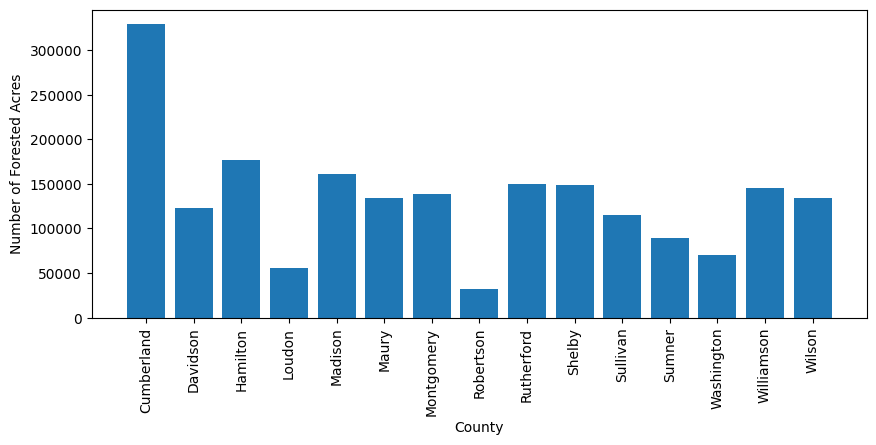

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(forested_acres['CountyName'], forested_acres['ForestedAcres'])
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Number of Forested Acres")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Cumberland'),
  Text(1, 0, 'Davidson'),
  Text(2, 0, 'Hamilton'),
  Text(3, 0, 'Loudon'),
  Text(4, 0, 'Madison'),
  Text(5, 0, 'Maury'),
  Text(6, 0, 'Montgomery'),
  Text(7, 0, 'Robertson'),
  Text(8, 0, 'Rutherford'),
  Text(9, 0, 'Shelby'),
  Text(10, 0, 'Sullivan'),
  Text(11, 0, 'Sumner'),
  Text(12, 0, 'Washington'),
  Text(13, 0, 'Williamson'),
  Text(14, 0, 'Wilson')])

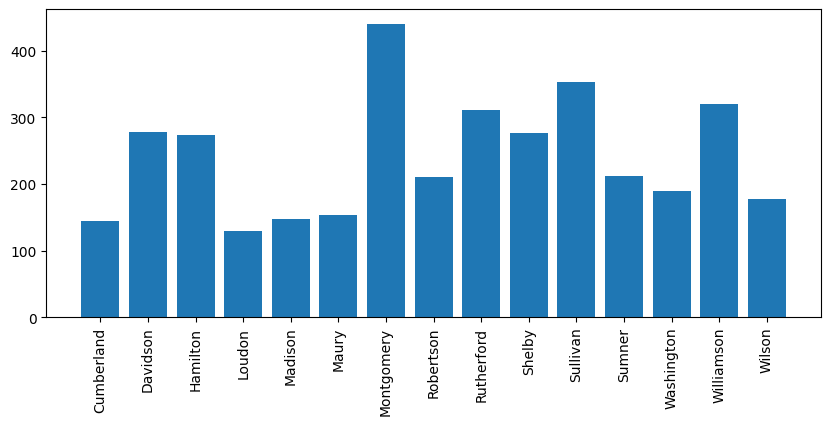

In [ ]:
top_fifteen = {element: top_fifteen.get(element) for element in sorted(top_fifteen.keys())} #alphabetize so we can compare directly with graph above
plt.figure(figsize = (10,4))
plt.bar(top_fifteen.keys(), top_fifteen.values())
plt.xticks(rotation=90)

In [ ]:
forested_acreage = forested_acres.groupby("CountyName")["ForestedAcres"].mean().to_dict()

In [ ]:
forested_acreage

{'Cumberland': 329038.0,
 'Davidson': 123258.0,
 'Hamilton': 177241.0,
 'Loudon': 55201.0,
 'Madison': 160683.0,
 'Maury': 134358.0,
 'Montgomery': 139178.0,
 'Robertson': 32260.0,
 'Rutherford': 150010.0,
 'Shelby': 149043.0,
 'Sullivan': 115113.0,
 'Sumner': 89345.0,
 'Washington': 70210.0,
 'Williamson': 144885.0,
 'Wilson': 134314.0}

In [ ]:
#We will store divided values in separate dictionary
dc_per_fa = {} #Deer crashes per forested acre
for key in top_fifteen:
  dc_per_fa[key] = top_fifteen[key]/forested_acreage[key]
print(dc_per_fa)

{'Cumberland': 0.0004396655300198356, 'Davidson': 0.0022527273415653888, 'Hamilton': 0.0015412160090874385, 'Loudon': 0.0023550298001847794, 'Madison': 0.000913807517493035, 'Maury': 0.0011461915181827655, 'Montgomery': 0.003166209218889959, 'Robertson': 0.006535441206860922, 'Rutherford': 0.002074306157367287, 'Shelby': 0.0018540510680362936, 'Sullivan': 0.0030679998494233204, 'Sumner': 0.002372824444568806, 'Washington': 0.0027085410435360585, 'Williamson': 0.002210948913506114, 'Wilson': 0.0013227710191541214}


Text(0, 0.5, 'Deer Crashes per Forested Acre')

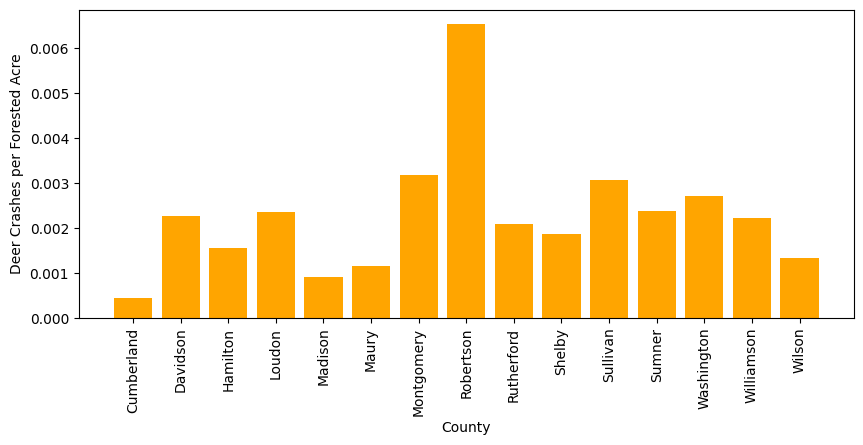

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(dc_per_fa.keys(), dc_per_fa.values(), color = "orange")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Deer Crashes per Forested Acre")

In [ ]:
population = pd.read_csv("/content/drive/MyDrive/co-est2023-pop-47.xlsx - CO-EST2023-POP-47 (1).csv")

In [ ]:
column_names = ["County", "2020 Actual", "2020 Pred", "2021 Pred", "2022 Pred", "2023 Pred"]

In [ ]:
current_columns= list(population.columns)

In [ ]:
hash_map = {}
for i in range(len(current_columns)):
  hash_map[current_columns[i]] = column_names[i]

population.rename(hash_map, axis = 1, inplace = True)

In [ ]:
population.dropna(axis = 0, inplace = True) #We can drop any null rows, because they only exist as a result of how the file was formatted.
#All the rows we actually need have no null values

In [ ]:
population

,County,2020 Actual,2020 Pred,2021 Pred,2022 Pred,2023 Pred
3,Tennessee,6910786,6926091,6963709.0,7048976.0,7126489.0
4,".Anderson County, Tennessee",77147,77320,77615.0,78929.0,80234.0
5,".Bedford County, Tennessee",50237,50385,51184.0,51964.0,53055.0
6,".Benton County, Tennessee",15867,15855,15837.0,15994.0,16103.0
7,".Bledsoe County, Tennessee",14917,14956,14837.0,14824.0,15060.0
...,...,...,...,...,...,...
94,".Wayne County, Tennessee",16231,16222,16329.0,16266.0,16066.0
95,".Weakley County, Tennessee",32903,32903,32883.0,33043.0,33084.0
96,".White County, Tennessee",27354,27444,27541.0,28000.0,28692.0
97,".Williamson County, Tennessee",247724,249552,256065.0,260738.0,264460.0


In [ ]:
population.drop(3, axis = "index", inplace = True)

In [ ]:
for i in range(len(population)):
    population["County"].iloc[i]= population["County"].iloc[i][(population["County"].iloc[i].index(".") + 1):population["County"].iloc[i].index(" ")]

<ipython-input-33-943558daab4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population["County"].iloc[i]= population["County"].iloc[i][(population["County"].iloc[i].index(".") + 1):population["County"].iloc[i].index(" ")]
<ipython-input-33-943558daab4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population["County"].iloc[i]= population["County"].iloc[i][(population["County"].iloc[i].index(".") + 1):population["County"].iloc[i].index(" ")]
<ipython-input-33-943558daab4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [ ]:
population['2020 Actual'] = pd.to_numeric(population['2020 Actual'], errors='coerce').astype(float)

In [ ]:
population= population[population["County"].isin(top_fifteen)]

In [ ]:
population["2020 Actual"]

21     61151.0
22    715878.0
36    366209.0
56     54887.0
60     98833.0
63    100969.0
66    219996.0
77     72805.0
78    341483.0
82    930020.0
85    158162.0
86    196285.0
93    133003.0
97    247724.0
98    147748.0
Name: 2020 Actual, dtype: float64

In [ ]:
pop_hash = population.groupby("County")["2020 Actual"].mean().to_dict()

Text(0, 0.5, 'Population')

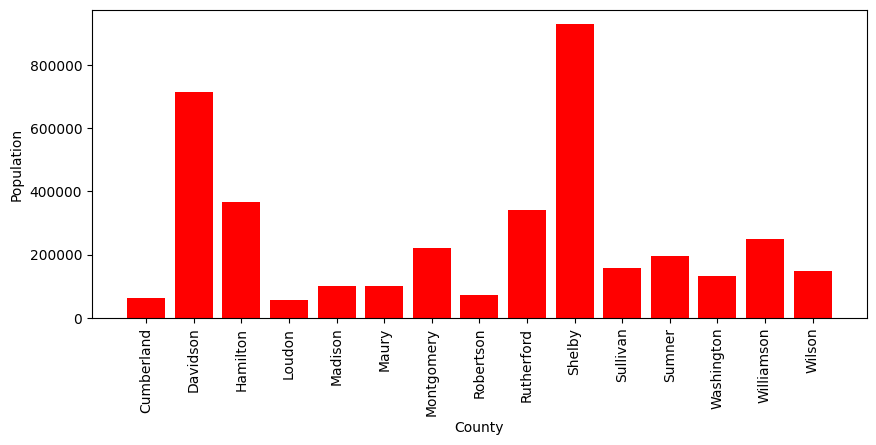

In [ ]:

plt.figure(figsize=(10,4))
plt.bar(population["County"], population["2020 Actual"], color = "red")
plt.xticks(rotation = 90)
plt.xlabel("County")
plt.ylabel("Population")

In [ ]:
pop_hash

{'Cumberland': 61151.0,
 'Davidson': 715878.0,
 'Hamilton': 366209.0,
 'Loudon': 54887.0,
 'Madison': 98833.0,
 'Maury': 100969.0,
 'Montgomery': 219996.0,
 'Robertson': 72805.0,
 'Rutherford': 341483.0,
 'Shelby': 930020.0,
 'Sullivan': 158162.0,
 'Sumner': 196285.0,
 'Washington': 133003.0,
 'Williamson': 247724.0,
 'Wilson': 147748.0}

In [ ]:
dc_per_pop = {}
for key in top_fifteen:
  dc_per_pop[key] = top_fifteen[key]/pop_hash[key]
print(dc_per_pop)

{'Cumberland': 0.0023657285517271454, 'Davidson': 0.0003878686964352399, 'Hamilton': 0.0007459310575836932, 'Loudon': 0.0023685025598046898, 'Madison': 0.0014856711152482808, 'Maury': 0.0015252206122671314, 'Montgomery': 0.0020030667224252563, 'Robertson': 0.0028958633793466568, 'Rutherford': 0.0009112215444595095, 'Shelby': 0.0002971262266761288, 'Sullivan': 0.0022329425947235537, 'Sumner': 0.001080062154520213, 'Washington': 0.0014297923104491376, 'Williamson': 0.0012931057682474582, 'Wilson': 0.0012024979469547246}


Text(0, 0.5, 'Deer Crashes per Person')

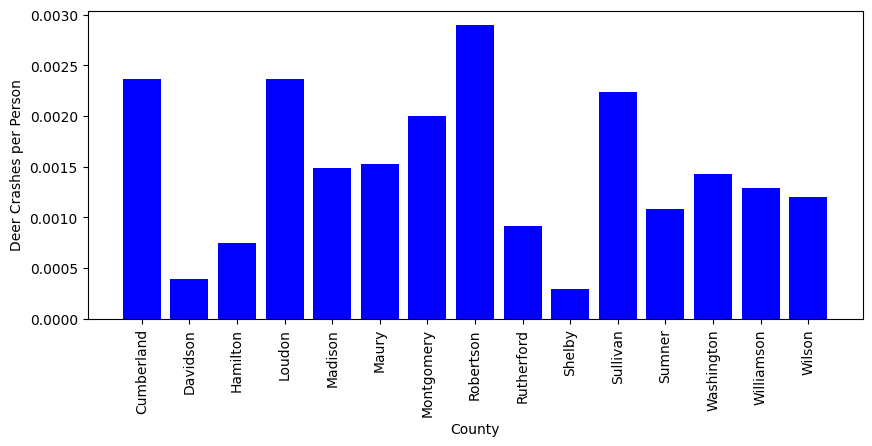

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(dc_per_pop.keys(), dc_per_pop.values(), color = "blue")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Deer Crashes per Person")